#### Min-Cut: Karger's Algorithm

Implementation of Karger's algorithm (Contraction algorithm) for finding global minimum cut of a connected undirected graph.

In [51]:
import random, math
random.seed(0)

In [122]:
# contract edge (u,v) and return the adjacenecy list of the resulting graph
def contract_edge(u,v, adjacency_list, supernode_dict, new_supernode_id):
    assert u in adjacency_list and v in adjacency_list, "u and v must be in the adjacency list"

    # merge u and v into a new super node
    w = new_supernode_id
    supernode_dict[w] = supernode_dict[u] + supernode_dict[v]
    del supernode_dict[u]
    del supernode_dict[v]
    # update adjacent list
    adjacency_list[w] = []
    # connect w with edges incident on u (exclude self-loop)
    for node in adjacency_list[u]:
        if node != v:
            adjacency_list[w].append(node)
            adjacency_list[node].remove(u)
            adjacency_list[node].append(w)

    # connect w with edges incident on v (exclude self-loop)
    for node in adjacency_list[v]:
        if node != u:
            adjacency_list[w].append(node)
            adjacency_list[node].remove(v)
            adjacency_list[node].append(w)

    # remove u and v from the adjacency list
    del adjacency_list[u]
    del adjacency_list[v]        

    return adjacency_list, supernode_dict, new_supernode_id+1   


def contraction_algorithm(adjacency_list, verbose=False):
    # make a copy of the adjacency list
    G = {node: list(neighbors) for node,neighbors in adjacency_list.items()}
    # create supernode dictionary, each supernode is a list/set of nodes, initially each node is a supernode,
    supernode_dict = {}
    for node in G:
        supernode_dict[node] = [node]
    new_supernode_id = len(G)   
    if verbose:
        print(f"initial supernodes: {supernode_dict}")
        print(f"initial G: {G}")

    # randomly select an edge (u,v) to contract
    while len(G) > 2:
        # randomly select an edge (u,v) to contract
        u = random.choice(list(G.keys()))
        v = random.choice(G[u])
        # contract the edge
        G, supernode_dict, new_supernode_id = contract_edge(u, v, G, supernode_dict, new_supernode_id)
        if verbose:
            print(f"\ncontracting edge ({u},{v})")
            print(f"supernodes: {supernode_dict}")
            print(f"updated G: {G}")

    # extract all edges in cut(A,B)
    supernode_sets = list(supernode_dict.values())
    A = supernode_sets[0]
    B = supernode_sets[1]
    cut = []
    for u in A:
        for v in adjacency_list[u]:
            if v in B:
                cut.append((u, v))

    if verbose:
        print(f"super nodes: {supernode_dict}")
        print(f"\nA = {A}, B = {B}")
        print(f"cut: {cut}")

    return cut


def karger_min_cut(adjacency_list, verbose=False):
    mincut = None
    n = len(adjacency_list)
    num_iterations = int(n*n*math.log(n))
    print(f"Running karger min cut algorithm with {num_iterations} iterations")
    for i in range(num_iterations):
        if verbose:
            print(f"\nIteration #{i+1}")
        cut_i = contraction_algorithm(adjacency_list, verbose=verbose)
        if mincut is None or len(cut_i) < len(mincut):
            mincut = cut_i

    if verbose:
        print(f"mincut: {mincut}")

    return mincut


In [127]:
# example graph
adjacency_list = {0:[1,2,3], 1:[0,2], 2:[0,1,3], 3:[0,2]}

# compute mincut
mincut = karger_min_cut(adjacency_list, verbose=False)
print(f"mincut: {mincut}")

Running karger min cut algorithm with 22 iterations
mincut: [(3, 0), (3, 2)]


In [124]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(adjacency_list, fig_size=5):
    adjacency_list = list(adjacency_list.values())
    # Create a new graph
    G = nx.Graph()

    # Add edges to the graph
    for node, neighbours in enumerate(adjacency_list):
        for neighbour in neighbours:
            G.add_edge(node, neighbour)

    # Draw the graph
    plt.figure(figsize=(fig_size, fig_size))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()


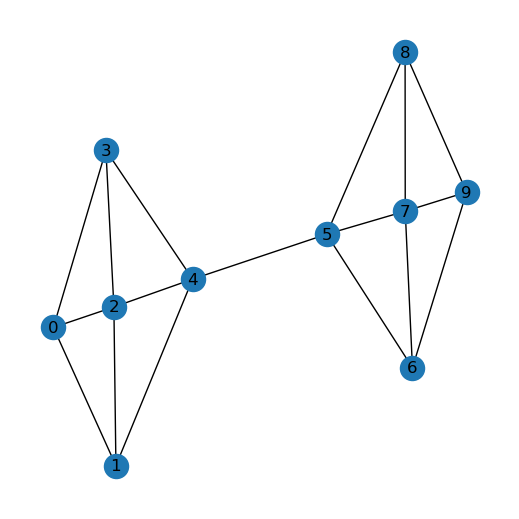

Running karger min cut algorithm with 230 iterations
mincut: [(5, 4)]


In [129]:
# larger example graph
adjacency_list = {0:[1,2,3], 1:[0,2,4], 2:[0,1,3,4], 3:[0,2,4], 4:[1,2,3,5], 5:[4,6,7,8], 6:[5,7,9], 7:[5,6,8,9], 8:[5,7,9], 9:[6,7,8]}
plot_graph(adjacency_list, fig_size=5)

# compute mincut
mincut = karger_min_cut(adjacency_list, verbose=False)
print(f"mincut: {mincut}")